## Linear Support Vector Classifier

In [329]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

In [330]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.5)
X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
y = np.reshape(np.vectorize(lambda x: -1 if x == 0 else x)(y), (100, 1))

print("X Shape: ",X.shape)
print("y shape: ",y.shape)

X Shape:  (100, 3)
y shape:  (100, 1)


In [331]:
class LinearSVC:

    def __init__(self, C, lr, epochs=100):
        
        self.C = C
        self.lr = lr
        self.epochs = epochs
        self.w = None

    def fit(self, X, y):

        self.w = np.random.randn(X.shape[1])

        for epoch in range(self.epochs):

            for i in range(X.shape[0]):

                if y[i] * np.matmul(self.w.T, X[i, :]) < 1:

                    self.w -= self.lr * (self.w - self.C * y[i] * X[i, :].T)
                
                else:

                    self.w -= self.lr*self.w
        
        self.w = np.reshape(self.w, (X.shape[1], 1))

        
    
        




In [332]:
svc = LinearSVC(50, 0.1, 10)

svc.fit(X, y)

[[ 1.38086631]
 [-9.57954246]
 [-0.13309387]]


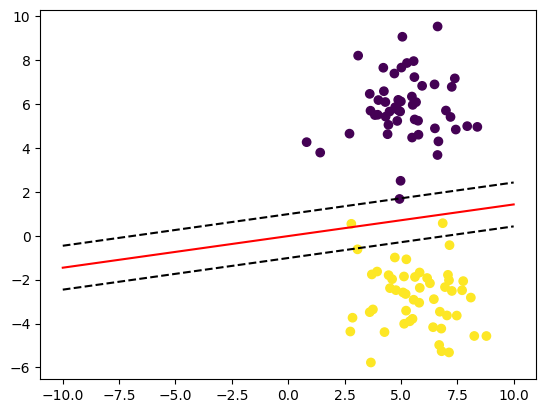

In [334]:
svc_x = np.linspace(-10, 10)
svc_y = (-svc.w[0]/svc.w[1]) * svc_x - (svc.w[2] / svc.w[1])

margin_line_1 = (-svc.w[0]/svc.w[1]) * svc_x - (svc.w[2] / svc.w[1]) + 1
margin_line_2 = (-svc.w[0]/svc.w[1]) * svc_x - (svc.w[2] / svc.w[1]) - 1

print(svc.w)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(svc_x, svc_y, "r-")
plt.plot(svc_x, margin_line_1, "k--")
plt.plot(svc_x, margin_line_2, "k--")


